In [173]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set_style('dark')

import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15,5

from scipy.stats import skew
print('Library Loaded !')

Library Loaded !


In [398]:
print('Best score :',0.1246662171516166)

Best score : 0.1246662171516166


# I - Load the Data

In [273]:
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')
print('Data Loaded !')

Data Loaded !


In [406]:
print('Training set :',data_train.shape[0],'rows and',data_train.shape[1],'columns')
print('Testing set :',data_test.shape[0],'rows and',data_test.shape[1],'columns')

Training set : 1460 rows and 81 columns
Testing set : 1459 rows and 80 columns


In [407]:
#Merge all the datas
data_all = pd.concat([data_train,data_test],axis=0)

# II - Visualize the Data

In [408]:
data_all.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


Pourcentage of missing values

In [409]:
mv_index, mv_number = [] , []
for col in data_all.columns:
    if (col != 'SalePrice'):
        if (data_all[col].isna().sum() >0):
            mv_index.append(col)
            mv_number.append(data_all[col].isna().sum()/len(data_all[col]))
missing_values = pd.Series(mv_number, index=mv_index).sort_values(ascending=False)
print(missing_values)

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
FireplaceQu     0.486468
LotFrontage     0.166495
GarageQual      0.054471
GarageCond      0.054471
GarageFinish    0.054471
GarageYrBlt     0.054471
GarageType      0.053786
BsmtExposure    0.028092
BsmtCond        0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
Utilities       0.000685
Functional      0.000685
Electrical      0.000343
BsmtUnfSF       0.000343
Exterior1st     0.000343
Exterior2nd     0.000343
TotalBsmtSF     0.000343
GarageArea      0.000343
GarageCars      0.000343
BsmtFinSF2      0.000343
BsmtFinSF1      0.000343
KitchenQual     0.000343
SaleType        0.000343
dtype: float64


In [410]:
data_all.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,...,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,...,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,...,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,...,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,...,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,...,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,...,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


Text(0.5, 1.0, 'Log Price')

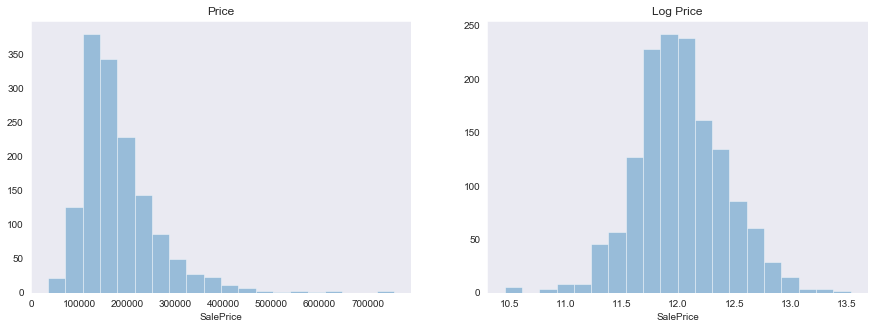

In [411]:
fig, (ax1,ax2) = plt.subplots(1,2)

sns.distplot(data_train.SalePrice, ax=ax1,bins=20,kde=False)
ax1.set_title('Price')

sns.distplot(np.log1p(data_train.SalePrice),ax=ax2, bins=20,kde=False)
ax2.set_title('Log Price')

# III - Prepare the Data

In [443]:
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')
data_all = pd.concat([data_train,data_test],axis=0)
print('Data Loaded !')

Data Loaded !


We compute the skew of each variable and if it's more than 0.75 we rescale it with ln(1+x)

In [444]:
numeric_feats = data_train.select_dtypes(exclude="object").columns

In [445]:
numeric_feats_skewed = []
for col in numeric_feats:
    if (skew(data_train[col]) >0.75) : #& (col !='SalePrice'):
        numeric_feats_skewed.append(col)
print(numeric_feats_skewed)

['MSSubClass', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


In [446]:
data_all[numeric_feats_skewed] = np.log1p(data_all[numeric_feats_skewed])

In [447]:
data_all.PoolQC = data_all.PoolQC.fillna('None')

Now we compute dummy variable for categorical ones

In [448]:
data_all = pd.get_dummies(data_all)

Repace missing values by mean

In [449]:
data_all = data_all.fillna(data_all.mean())

In [450]:
X_train = data_all.iloc[:len(data_train),:].drop(columns=['Id','SalePrice'])
y_train = data_all.iloc[:len(data_train),:].SalePrice

X_test = data_all.iloc[len(data_train):,:].drop(['Id','SalePrice'],axis=1)

In [451]:
X_train.shape

(1460, 289)

In [452]:
X_test.shape

(1459, 289)

# IV - Machine Learning Models

In [292]:
from sklearn.model_selection import cross_val_score

In [297]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

## Linear Regression

In [453]:
from sklearn.linear_model import LinearRegression

In [454]:
model_linear = LinearRegression()

In [455]:
score = np.sqrt(-cross_val_score(model_linear,X_train,y=y_train,cv=5,scoring = 'neg_mean_squared_error'))
print('score :',score.mean())

score : 0.1446579782803529


## Ridge Regression

In [456]:
from sklearn.linear_model import Ridge

In [457]:
model_ridge = Ridge()

In [458]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = []
for alpha in alphas :
    model_ridge = Ridge(alpha=alpha)
    cv_ridge.append(np.sqrt(-cross_val_score(model_ridge,X_train,y=y_train,cv=5,scoring = 'neg_mean_squared_error').mean()))

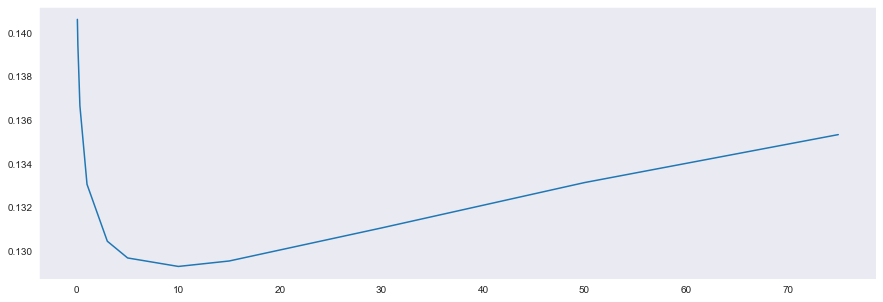

In [459]:
plt.plot(alphas,cv_ridge)

In [460]:
model_ridge = Ridge(alpha=10)
score = np.sqrt(-cross_val_score(model_linear,X_train,y=y_train,cv=5,scoring = 'neg_mean_squared_error'))
print('score :',score.mean())

score : 0.1446579782803529


## Lasso

In [467]:
from sklearn.linear_model import Lasso

In [468]:
model_lasso = Lasso()

In [469]:
alphas = [0.00001,0.0001,0.001,0.005,0.05,0.1]
cv_lasso = []
for alpha in alphas :
    model_lasso = Lasso(alpha=alpha)
    cv_lasso.append(np.sqrt(-cross_val_score(model_lasso,X_train,y=y_train,cv=5,scoring = 'neg_mean_squared_error').mean()))

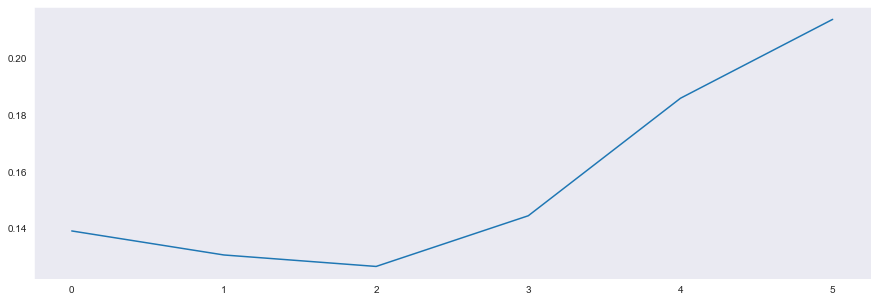

In [470]:
plt.plot(cv_lasso)

In [471]:
model_lasso = Lasso(alpha=0.0005)
print(np.sqrt(-cross_val_score(model_lasso,X_train,y=y_train,cv=5,scoring = 'neg_mean_squared_error').mean()))

0.12466621715161658


In [472]:
model_lasso = Lasso(alpha=0.0005)
model_lasso.fit(X_train,y_train)
coeff = pd.Series.sort_values((pd.Series(model_lasso.coef_,index=X_train.columns,)),ascending = False)
print('Lasso method elimate',(coeff==0).sum(),'features')

Lasso method elimate 176 features


## ElasticNet

In [473]:
from sklearn.linear_model import ElasticNet

In [474]:
l1_regu = [1,5,10,20,50]
l2_regu = [0.00001,0.0001,0.001,0.005,0.05,0.1]

In [475]:
best_coeff = pd.Series([0.0,0.0,0.0],index=['l1_regu','l2_regu','score'])
error = 100
for alpha in l2_regu :
    for beta in l1_regu :
        model_ElasticNet = ElasticNet(alpha=alpha,l1_ratio=beta)
        score = np.sqrt(-cross_val_score(model_ElasticNet,X_train,y=y_train,cv=5,scoring = 'neg_mean_squared_error').mean())
        if (score < error):
            best_coeff.l2_regu = alpha
            best_coeff.l1_regu = beta
            best_coeff.score = score
            error = score
print(best_coeff)


l1_regu    1.000000
l2_regu    0.001000
score      0.126604
dtype: float64


In [476]:
model_elasticNet = ElasticNet(alpha=0.001,l1_ratio=1)
print(np.sqrt(-cross_val_score(model_elasticNet,X_train,y=y_train,cv=5,scoring = 'neg_mean_squared_error').mean()))

0.1266035815391618


# Submission

In [477]:
model_final = Lasso(alpha=0.0005)

In [478]:
model_final.fit(X_train,y_train)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [479]:
predictions = np.exp(model_final.predict(X_test))

In [480]:
data_test = pd.read_csv('data/test.csv')
output = pd.DataFrame({'Id': data_test.Id, 'SalePrice': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [482]:
X_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,6.753438,6.751101,0.0,3,6.561031,0.0,1.0,0.000000,5.017280,0.000000,...,0,0,0,0,0,1,0,1,1,0
1,7.141245,0.000000,0.0,3,6.886532,0.0,0.0,0.693147,5.652489,0.000000,...,0,0,0,0,0,1,0,1,1,0
2,6.825460,6.765039,0.0,3,6.188264,0.0,1.0,0.000000,6.075346,0.000000,...,0,0,0,0,0,1,0,1,1,0
3,6.869014,6.629363,0.0,3,5.379897,0.0,1.0,0.000000,6.293419,5.609472,...,0,0,0,0,0,1,0,1,1,0
4,7.044033,6.960348,0.0,4,6.486161,0.0,1.0,0.000000,6.196444,0.000000,...,0,0,0,0,0,1,0,1,1,0


In [483]:
X_test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,6.799056,0.000000,0.0,2,6.150603,4.976734,0.0,0.0,5.602119,0.0,...,0,0,0,0,0,1,0,1,1,0
1,7.192934,0.000000,0.0,3,6.828712,0.000000,0.0,0.0,6.008813,0.0,...,0,0,0,0,0,1,0,1,1,0
2,6.834109,6.553933,0.0,3,6.674561,0.000000,0.0,0.0,4.927254,0.0,...,0,0,0,0,0,1,0,1,1,0
3,6.831954,6.520621,0.0,3,6.401917,0.000000,0.0,0.0,5.783825,0.0,...,0,0,0,0,0,1,0,1,1,0
4,7.155396,0.000000,0.0,2,5.575949,0.000000,0.0,0.0,6.925595,0.0,...,0,0,0,0,0,1,0,1,1,0
